# Bank Client Attributes and Marketing Outcomes - Supervised Learning

## 1. Dataset Analysis

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('./Assignment-2_Data.csv', index_col=0)

### 1.1 Data Preprocessing - Understanding the data

In [65]:
df.shape

(45211, 17)

In [66]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
Id,,,,,,,,,,,,,,,,,
1001,NaN,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1002,NaN,NaN,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
1003,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45211 entries, 1001 to 46211
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45199 non-null  float64
 1   job        45210 non-null  object 
 2   marital    45211 non-null  object 
 3   education  45211 non-null  object 
 4   default    45211 non-null  object 
 5   balance    45208 non-null  float64
 6   housing    45211 non-null  object 
 7   loan       45211 non-null  object 
 8   contact    45211 non-null  object 
 9   day        45211 non-null  int64  
 10  month      45211 non-null  object 
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  object 
 16  y          45211 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 6.2+ MB


In [68]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45199.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.933627,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.623149,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [69]:
df.isna().sum()

age          12
job           1
marital       0
education     0
default       0
balance       3
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

Because there are few nulls in the dataset, we decided to remove them.

In [70]:
df.dropna(inplace=True)

### 1.2 Descriptive Analysis

In [71]:
# For numerical columns, we analyze the distribution of the data
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000,45197.000000
mean,40.933204,1362.608027,15.809766,258.147974,2.764387,40.210589,0.580503
std,10.623076,3045.162034,8.321591,257.444942,3.098345,100.141627,2.303775
min,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,449.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [72]:
# For every column if it is of data type object, print the value counts of the column
for col in df.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()

Column: job
blue-collar      9730
management       9456
technician       7594
admin.           5169
services         4153
retired          2263
self-employed    1579
entrepreneur     1484
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

Column: marital
married     27208
single      12783
divorced     5206
Name: marital, dtype: int64

Column: education
secondary    23197
tertiary     13296
primary       6849
unknown       1855
Name: education, dtype: int64

Column: default
no     44383
yes      814
Name: default, dtype: int64

Column: housing
yes    25117
no     20080
Name: housing, dtype: int64

Column: loan
no     37956
yes     7241
Name: loan, dtype: int64

Column: contact
cellular     29285
unknown      13006
telephone     2906
Name: contact, dtype: int64

Column: month
may    13752
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      

### 1.3 Data Visualization

In [73]:
# TODO: Choose variable to analyze, it doesn't have to be 'job
'''
This takes too long to execute. I will comment it out for now.
'''
# sns.pairplot(df, hue='job')

'\nThis takes too long to execute. I will comment it out for now.\n'

#### 1.3.1 Distribution of Age

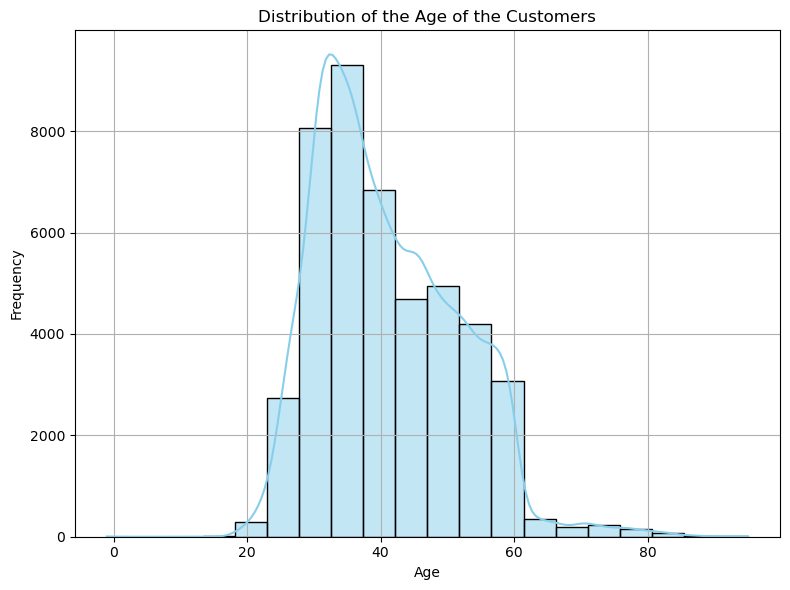

In [74]:
# Histogram of Age
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue') # type: ignore
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of the Age of the Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

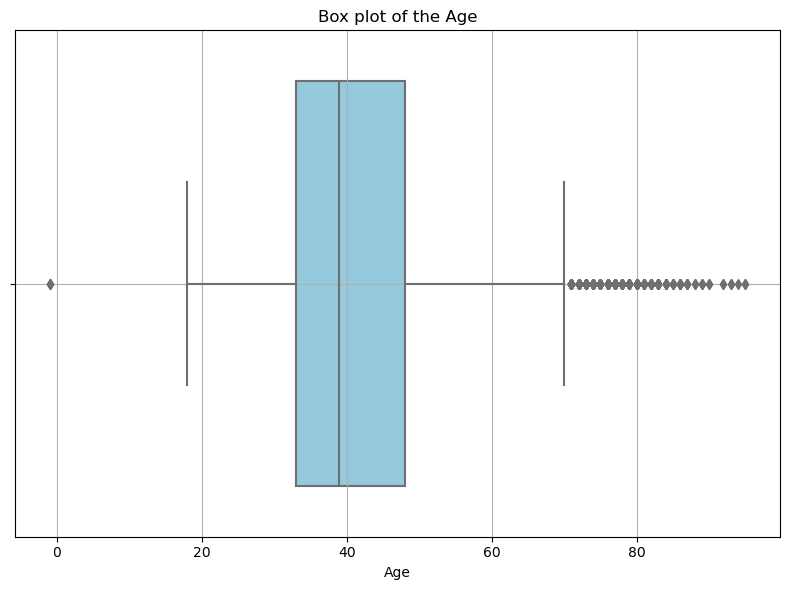

In [75]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'], color='skyblue')
plt.xlabel('Age')
plt.title('Box plot of the Age')
plt.grid(True)
plt.tight_layout()
plt.show()

#### 1.3.2 Distribution of Balance

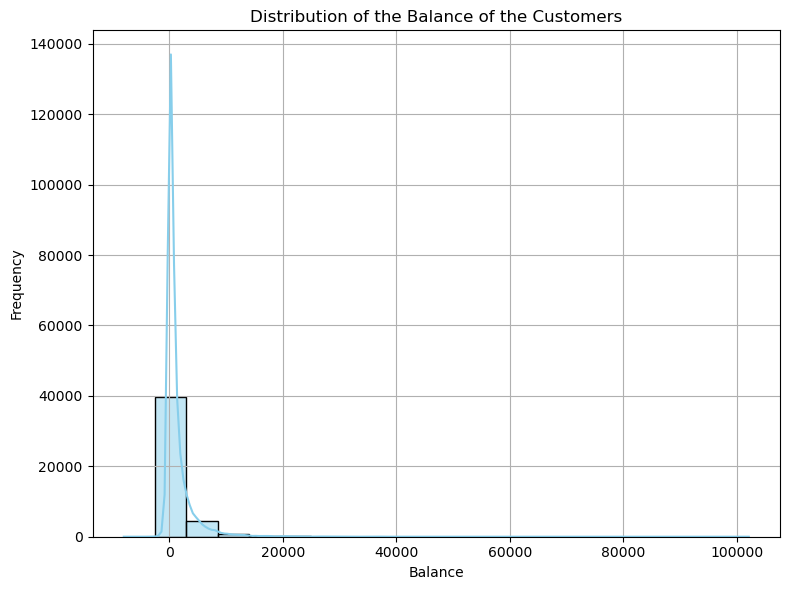

In [76]:
# Histogram of Balance
plt.figure(figsize=(8, 6))
sns.histplot(df['balance'], bins=20, kde=True, color='skyblue')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of the Balance of the Customers')
plt.grid(True)
plt.tight_layout()
plt.show()

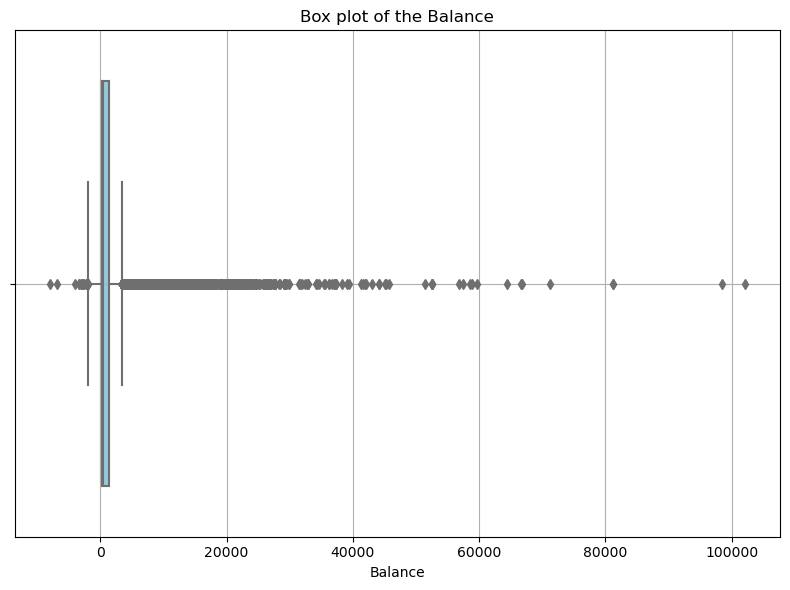

In [77]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['balance'], color='skyblue')
plt.xlabel('Balance')
plt.title('Box plot of the Balance')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 1.3.3 Visualization of Categorical Variables

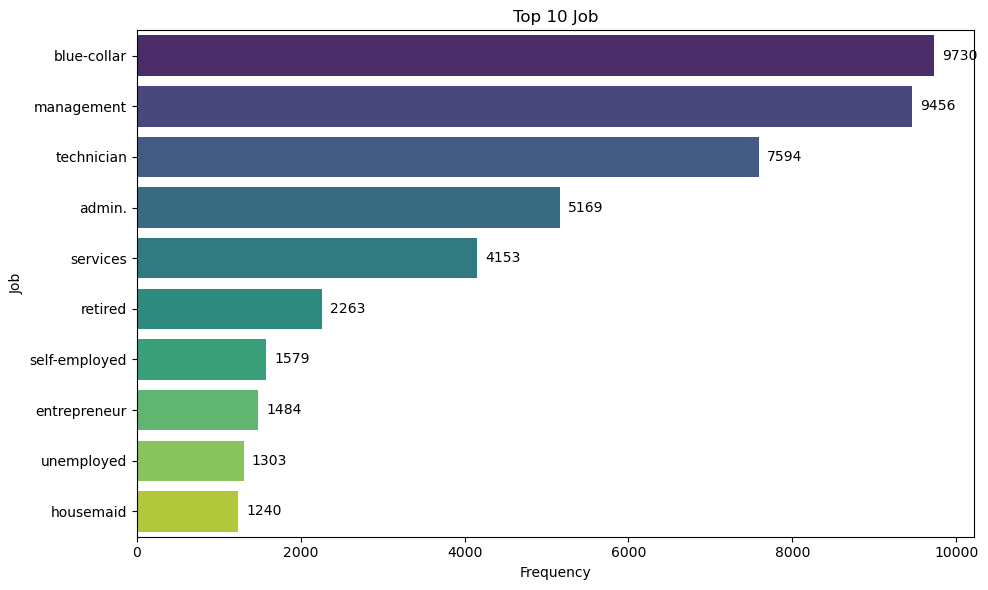

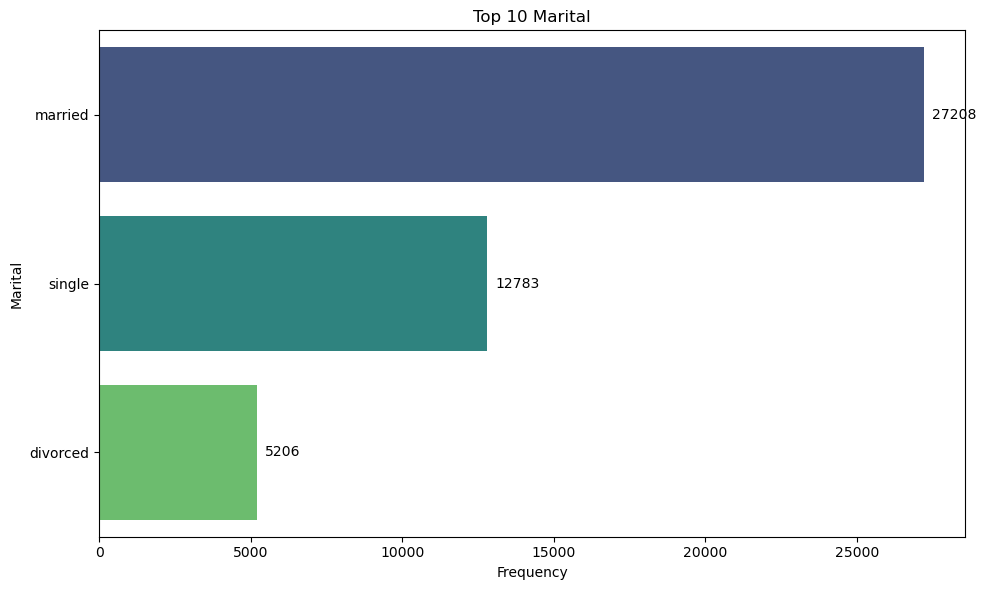

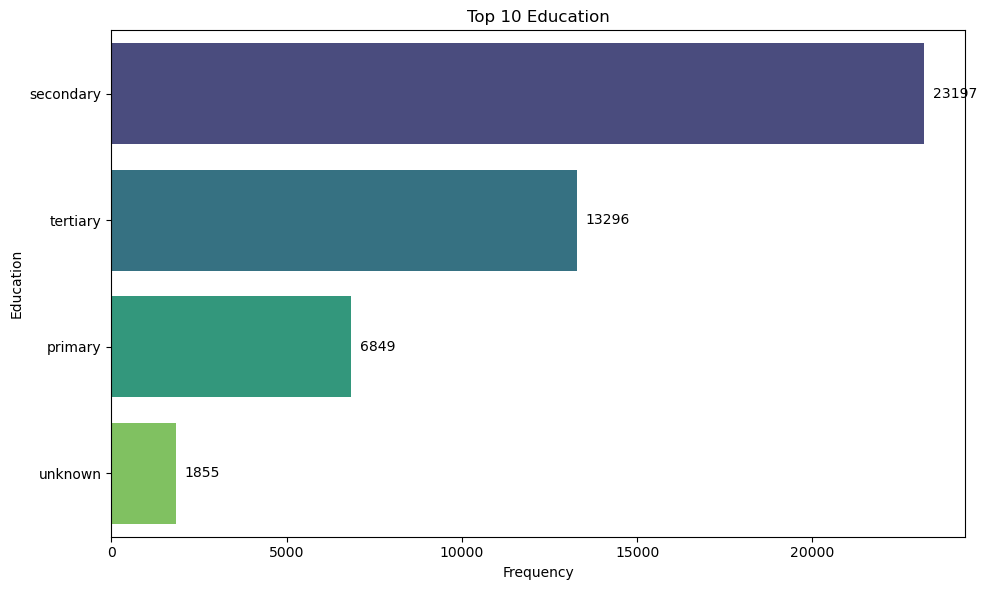

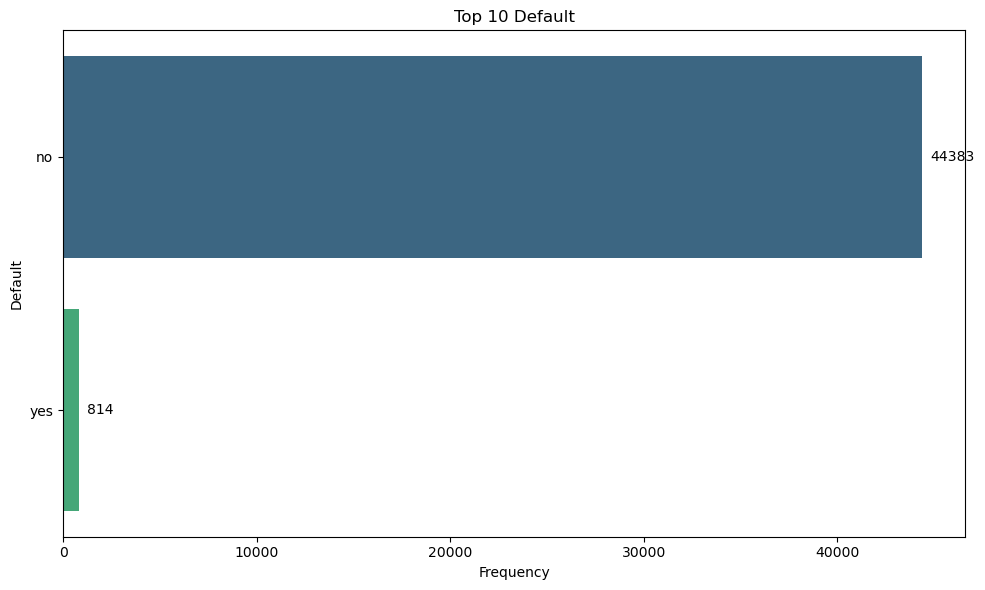

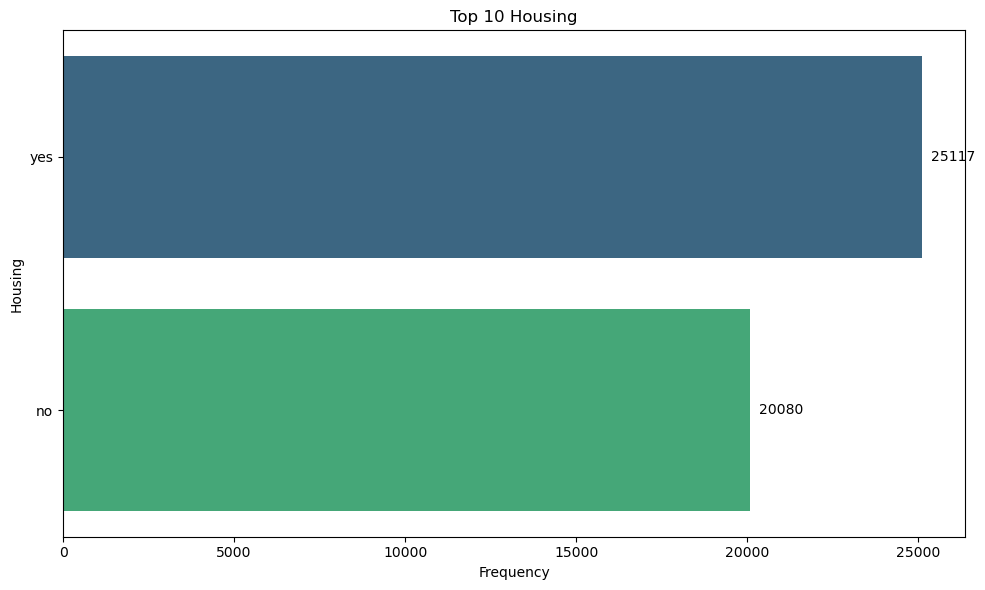

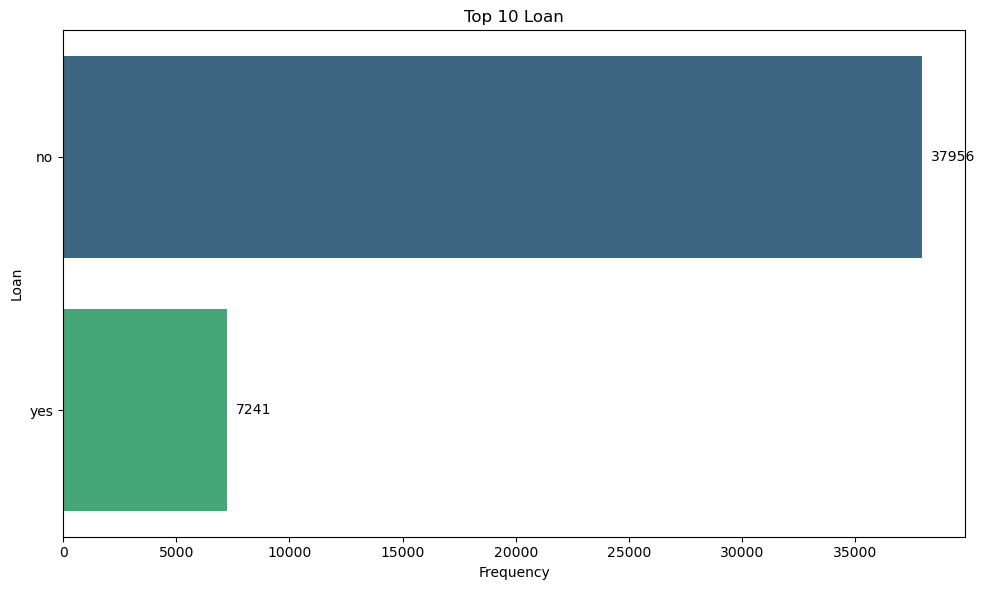

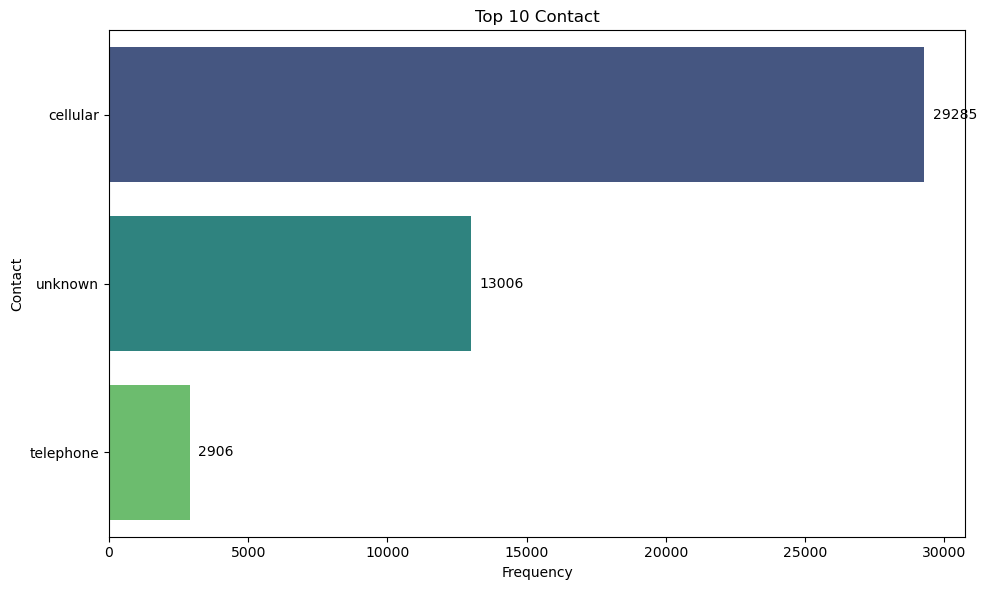

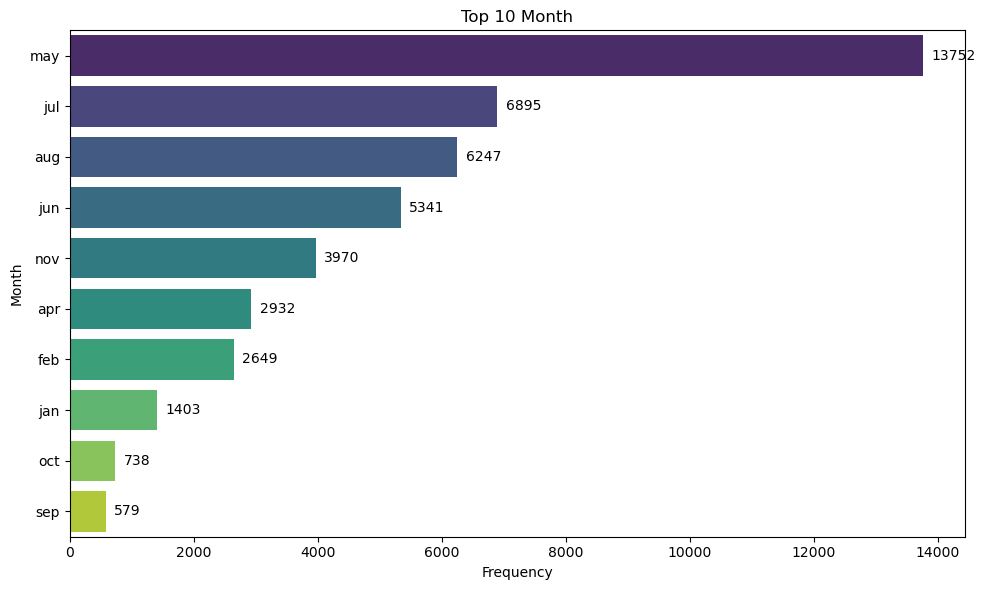

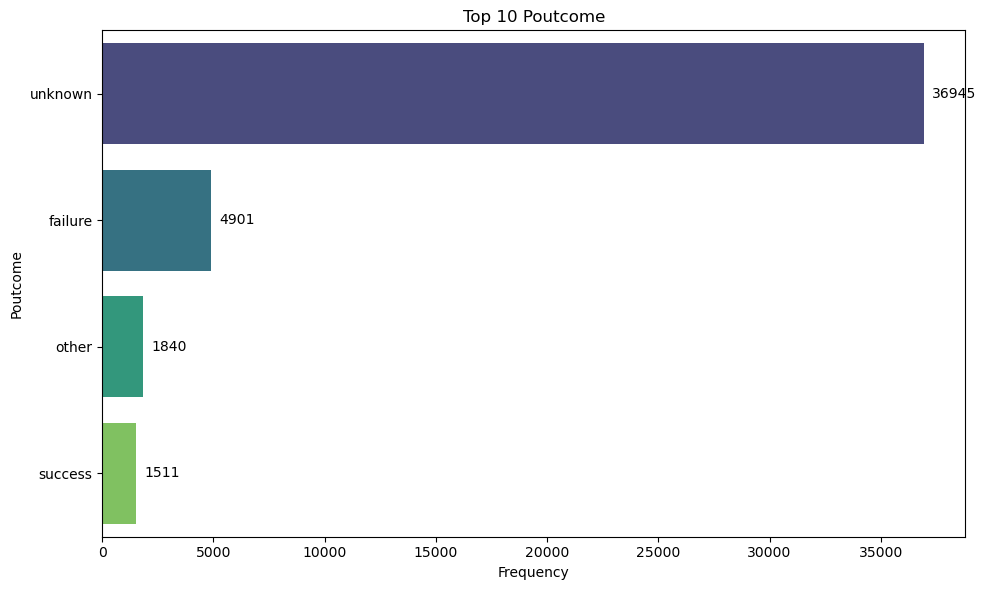

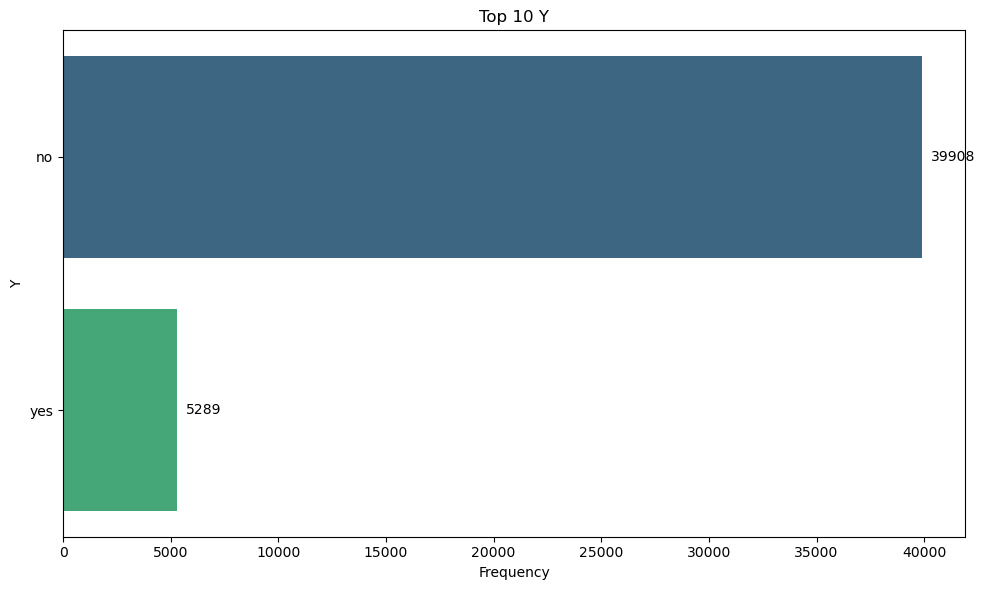

In [78]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Loop through non-numeric columns and create count plots for the top 10 most frequent values
for col in non_numeric_columns:
    top_10_values = df[col].value_counts().nlargest(10)  # Get the top 10 most frequent values
    plt.figure(figsize=(10, 6))  # Adjust the figure size
    ax = sns.barplot(x=top_10_values.values, y=top_10_values.index, palette='viridis', ci=None)  # Create a bar plot with seaborn, ci=None to remove confidence intervals
    plt.xlabel('Frequency')  # Add x-axis label
    plt.ylabel(col.capitalize())  # Add y-axis label with capitalized column name
    plt.title(f'Top 10 {col.capitalize()}')  # Add a descriptive title

    # Annotate each bar with its value
    for i, v in enumerate(top_10_values.values):
        ax.text(v + max(top_10_values.values) * 0.01, i, str(v), color='black', va='center')  # Adjust position of the annotation relative to the bar width

    plt.tight_layout()  # Adjust layout to prevent overlapping elements
    plt.show()